In [1]:
# Imports
import xarray as xr
from affine import Affine
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

# Read the data
da = xr.open_rasterio('D:/Data/SRTM_Ph/srtm_luzon_clipped.tif')
transform = Affine.from_gdal(*da.attrs['transform'])
# Create meshgrid from geotiff
nx, ny = da.sizes['x'], da.sizes['y']
x, y = np.meshgrid(np.arange(nx), np.arange(ny)) * transform

# Define extents
lat_min = 13
lat_max = 19
lon_min = 119.5
lon_max = 122.5

# Define the projection
crs=ccrs.PlateCarree()

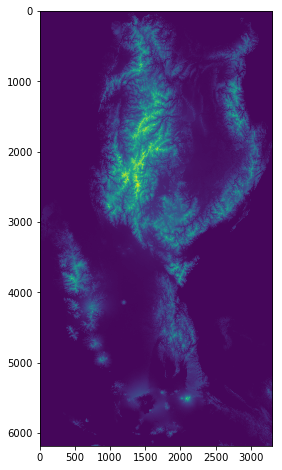

In [2]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
plt.show()

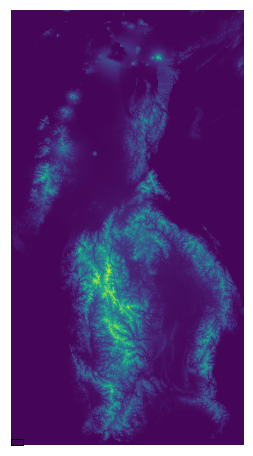

In [3]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
ax.imshow(da.variable.data[0])
plt.show()

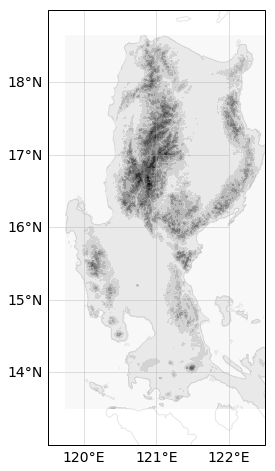

In [4]:
# Plot!
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
ax.coastlines(resolution='10m', alpha=0.1)
ax.contourf(x, y, da.variable.data[0], cmap='Greys')
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.xlabels_top = None
gl.ylabels_right = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlocator = mticker.FixedLocator(xgrid.tolist())
gl.ylocator = mticker.FixedLocator(ygrid.tolist())
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
plt.show()